In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("final_dataset.csv")

In [3]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
df.shape

(1461, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [6]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [7]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

<Axes: xlabel='AQI', ylabel='Count'>

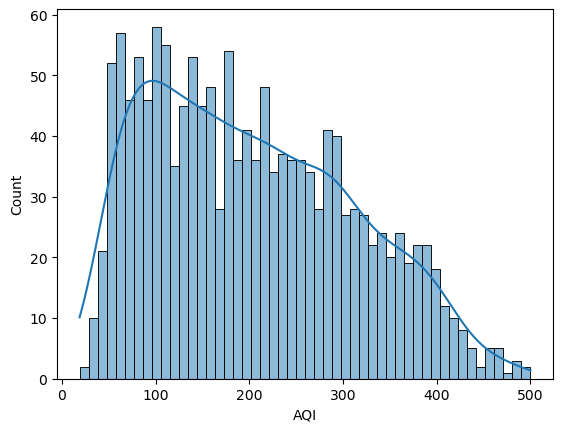

In [8]:
sns.histplot(df['AQI'],bins=50,kde=True)

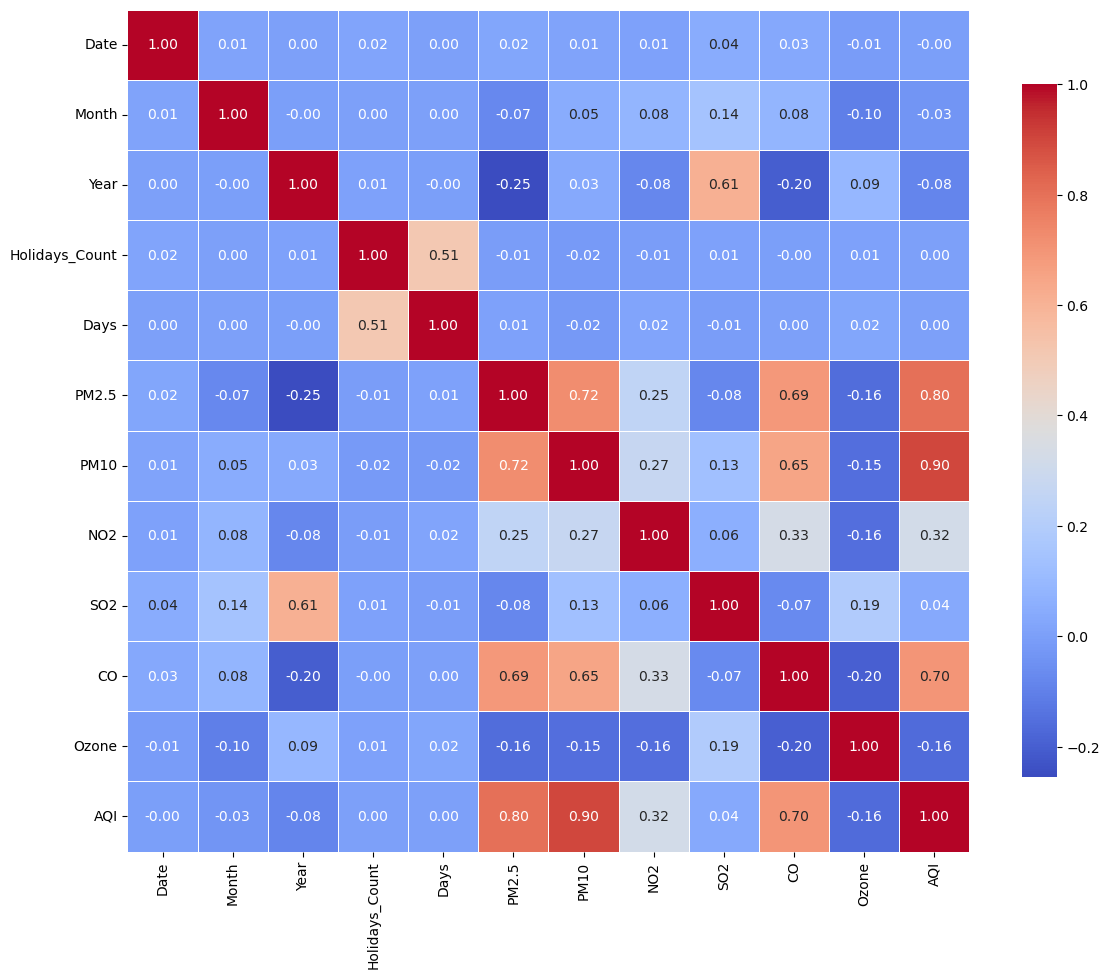

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, 
            annot_kws={'size': 10})
plt.tight_layout()
plt.show()

In [10]:
X=df.drop('AQI',axis=1)
y=df['AQI']

In [11]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, Ridge, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score



estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42, max_depth=12)),
    
    ('svr', make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=8))),
    ('mlp', make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(64,32),
                                                         max_iter=500, random_state=42))),
    ('ridge_base', make_pipeline(StandardScaler(), Ridge(alpha=1.0)))
]


final_estimator = RidgeCV(alphas=[0.1, 1.0, 10.0])

stack = StackingRegressor(estimators=estimators, final_estimator=final_estimator,
                          cv=5, n_jobs=-1, passthrough=False)  


scores = -cross_val_score(stack, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print("CV RMSE for stack (5-fold):", scores.mean(), "±", scores.std())




CV RMSE for stack (5-fold): 33.49332143862911 ± 2.163987567553635


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
features = ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
X_selected = X[features]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)
stack.fit(X_train_reg, y_train_reg)


y_pred = stack.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 26.31
MAE: 18.01
R² Score: 0.9467


In [13]:
import joblib
joblib.dump(stack, "stack_aqi_model.pkl")
joblib.dump(features, "feature_columns.pkl")

scaler = StandardScaler()
scaler.fit(X_train_reg)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']